# Churn Modelling Using ANN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import pickle

In [2]:
# Load the dataset
df = pd.read_csv("1. Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Removing unnecessary columns
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.duplicated().sum()   # No duplicates

0

In [7]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['HasCrCard'].unique()

array([1, 0], dtype=int64)

In [10]:
df['IsActiveMember'].unique()

array([1, 0], dtype=int64)

In [11]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

## Data Preprocessing

In [12]:
# Label encode Gender feature
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df[['Gender']])
df['Gender'].value_counts()

c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gender
1    5457
0    4543
Name: count, dtype: int64

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [14]:
# One Hot Encoding Geography feature
onehot = OneHotEncoder()
encoded = onehot.fit_transform(df[['Geography']]).toarray()
encoded_df = pd.DataFrame(encoded, columns=onehot.get_feature_names_out())
df = pd.concat([df.drop('Geography', axis=1).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [15]:
# Converting floats to int
df['Gender'] = df['Gender'].astype(int)
df['Geography_France'] = df['Geography_France'].astype(int)
df['Geography_Germany'] = df['Geography_Germany'].astype(int)
df['Geography_Spain'] = df['Geography_Spain'].astype(int)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


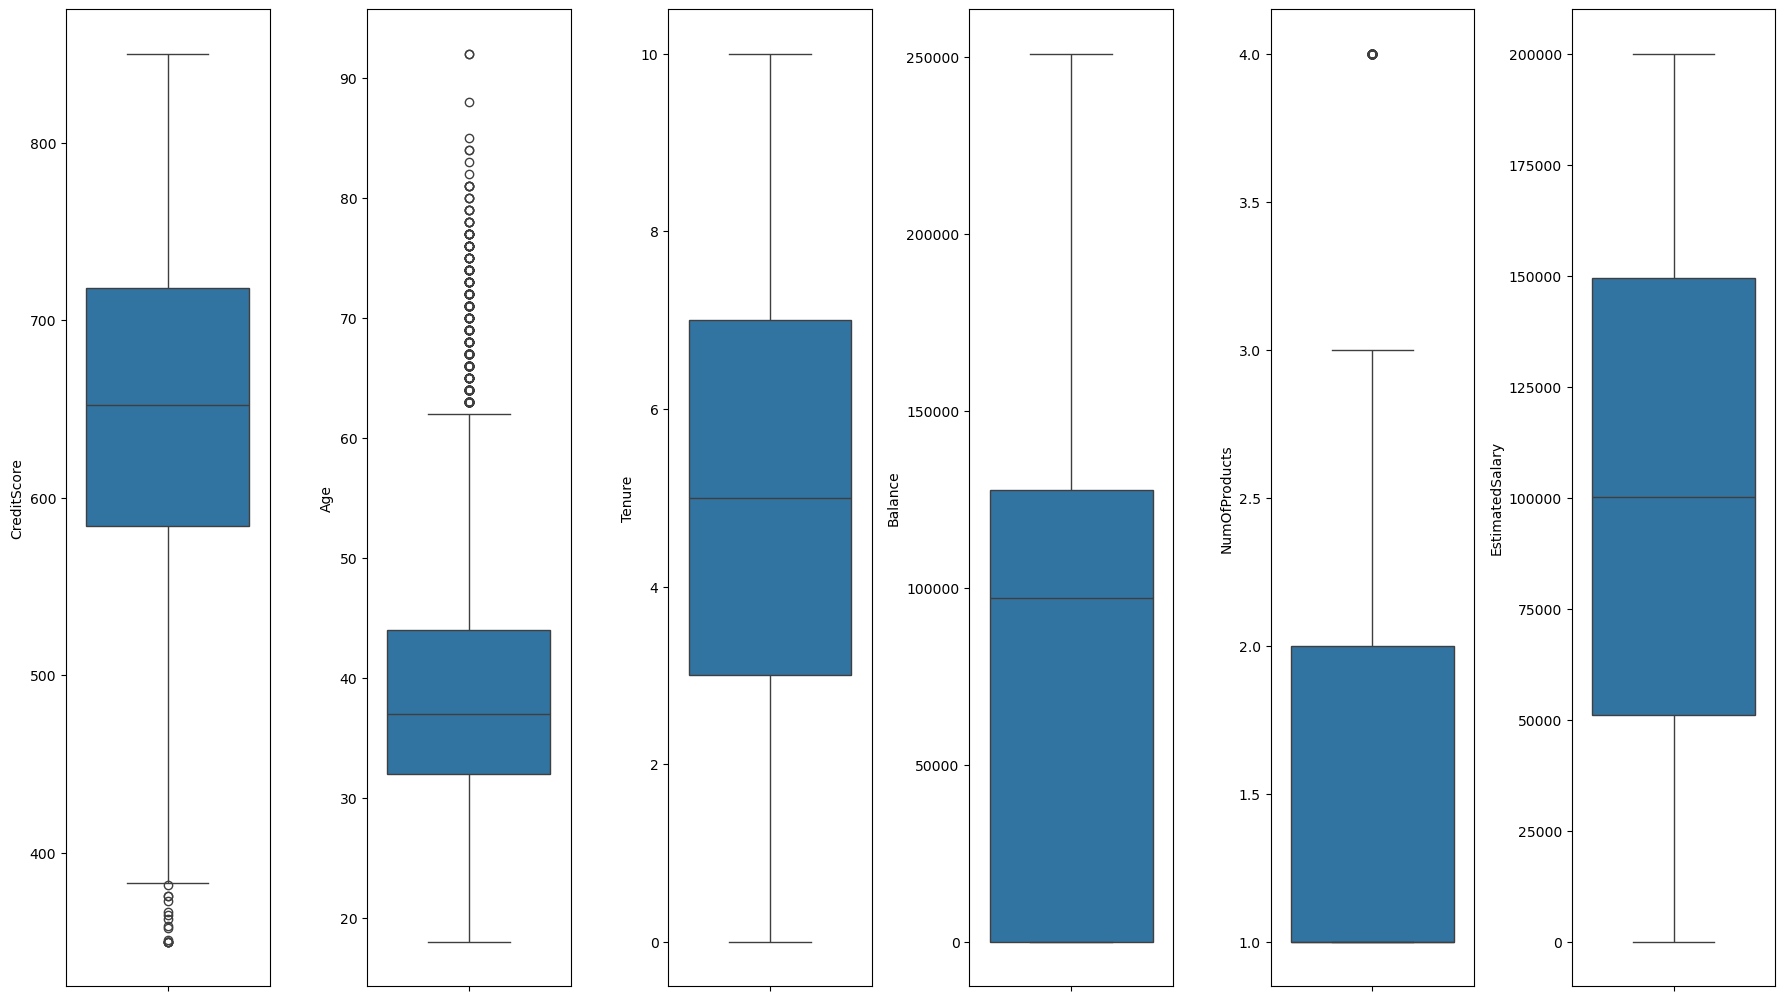

In [16]:
# Analysing features with their boxplot
import seaborn as sns
plt.figure(figsize=(30,30))

columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

for i in range(0,len(columns)):
    plt.subplot(3,10,i+1)
    sns.boxplot(df[columns[i]])
    plt.tight_layout()

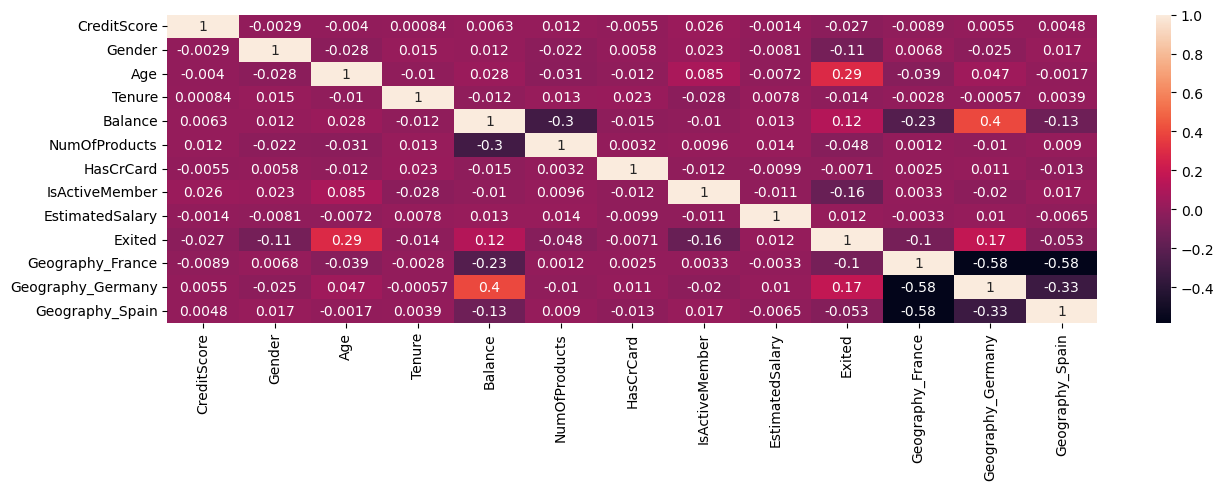

In [17]:
## Correlation
plt.figure(figsize=(15,4))
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [18]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [19]:
## Save the encoders
with open('onehotencoder_geo.pkl','wb') as file:
    pickle.dump(onehot,file)
with open('labelencoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder,file)

## Train-test Split

In [20]:
# Indpendent and dependent features
X = df[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 
        'NumOfProducts','HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain']]
y = df['Exited']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
(X_train.shape,X_test.shape)

((7000, 12), (3000, 12))

In [22]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9069,619,0,32,4,175406.13,2,1,1,172792.43,0,0,1
2603,643,0,34,7,160426.07,1,0,1,188533.11,0,1,0
7738,561,1,33,6,0.00,2,0,0,173680.39,1,0,0
1579,618,1,41,8,37702.79,1,1,1,195775.48,0,1,0
5058,714,1,37,9,148466.93,2,0,1,151280.96,1,0,0


In [23]:
# Standardizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train

array([[-0.34459497, -1.09823226, -0.65674999, ..., -1.00171576,
        -0.57559072,  1.73073215],
       [-0.09518109, -1.09823226, -0.46637979, ..., -1.00171576,
         1.73734559, -0.57779016],
       [-0.94734518,  0.91055421, -0.56156489, ...,  0.99828718,
        -0.57559072, -0.57779016],
       ...,
       [ 0.86090545, -1.09823226, -0.08563939, ...,  0.99828718,
        -0.57559072, -0.57779016],
       [ 0.15423279,  0.91055421,  0.39028611, ...,  0.99828718,
        -0.57559072, -0.57779016],
       [ 0.46600014,  0.91055421,  1.1517669 , ..., -1.00171576,
         1.73734559, -0.57779016]])

In [26]:
## Save this scaler object
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

## ANN Implementation

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [28]:
## Build our ANN model
model = Sequential([
    Dense(64, activation='relu',input_shape=(X_train.shape[1],)),       # HL1 connected to input layer. Specify the input shape here!
    Dense(32, activation='relu') ,                                       # HL2 
    Dense(1, activation='sigmoid')                                     # O/p layer
]
)                    

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Total/Trainable params are the count of weights and biases initialized in N.N.

In [31]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)      # optimizers. has many other optimizers too

In [32]:
## Compile the model
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
# Set up Tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tf_callback = TensorBoard(log_dir = log_dir, histogram_freq = 1)

In [34]:
# Set up Early Stopping( 
    # stops the training after the loss is not much decreasing after a no. of epochs even though given max. no. of epochs are not executed)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)        
# Be patient till 10 epochs 
# and restore the best weights after early stopping

In [35]:
## Training the model
history = model.fit(
    X_train,y_train,validation_data=(X_test,y_test),
    epochs = 100,
    callbacks = [tf_callback,early_stopping_callback],
)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.8022 - loss: 0.4553 - val_accuracy: 0.8587 - val_loss: 0.3488
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8582 - loss: 0.3521 - val_accuracy: 0.8583 - val_loss: 0.3646
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8549 - loss: 0.3551 - val_accuracy: 0.8663 - val_loss: 0.3432
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8531 - loss: 0.3525 - val_accuracy: 0.8680 - val_loss: 0.3392
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8622 - loss: 0.3385 - val_accuracy: 0.8610 - val_loss: 0.3473
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8583 - loss: 0.3474 - val_accuracy: 0.8607 - val_loss: 0.3462
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8571 - loss: 0.3379 - val_accuracy: 0.8687 - val_loss: 0.3379
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8660 - loss: 0.3315 - val

In [36]:
model.save('model.h5')

In [37]:
# load TensorBoard Extension
%load_ext tensorboard

In [42]:
%tensorboard --logdir logs/fit/20250215-144951      # Run 2 time to get tensorboard, also give correct foldername

Reusing TensorBoard on port 6007 (pid 6608), started 0:00:16 ago. (Use '!kill 6608' to kill it.)

In [39]:
## Load the pickle file